In [1]:
# reference: https://github.com/andy6804tw/2021-13th-ironman/blob/main/14.%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97/14.1.%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97(Classification-iris).ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
df_data = pd.read_csv('data.csv')
headers = list(df_data)
X = df_data.drop(labels=['label'], axis=1).to_numpy()
y = df_data['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)


train shape: (1400, 6)
test shape: (600, 6)


In [6]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
randomForestModel.fit(X_train, y_train)
predicted = randomForestModel.predict(X_train)


In [7]:
print('Training: ',randomForestModel.score(X_train,y_train))
print('Testing: ',randomForestModel.score(X_test,y_test))
print('Feature Importance: ',randomForestModel.feature_importances_)

Training:  1.0
Testing:  1.0
Feature Importance:  [0.10076392 0.01574011 0.35279699 0.07908701 0.16178317 0.28982879]


In [10]:
# Visualization
df_test=pd.DataFrame(X_test, columns= headers[:-1])
df_test['label'] = y_test
pred = randomForestModel.predict(X_test)
df_test['Predict'] = pred


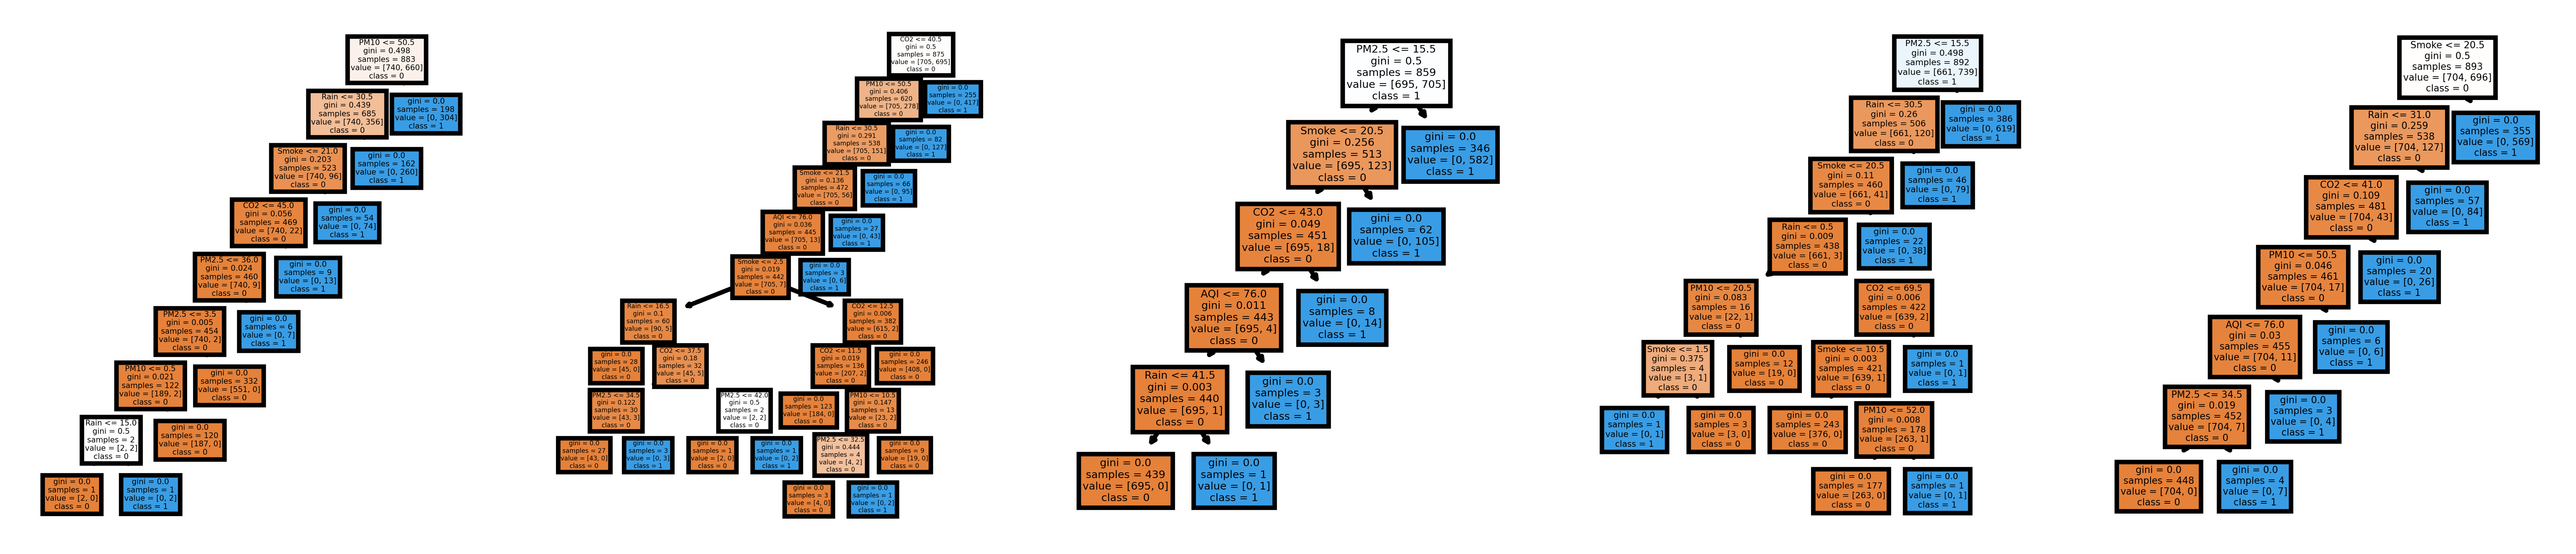

In [12]:
from sklearn import tree
featureName=headers[:-1]
className=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
# Only plot 5 trees
for index in range(0, 5):
    tree.plot_tree(randomForestModel.estimators_[index],
                   feature_names = featureName, 
                   class_names=className,
                   filled = True,
                   ax = axes[index])